In [106]:
from matplotlib import rcParams
rcParams['font.family'] = 'Avenir'
rcParams['font.size'] = 13
import matplotlib.pyplot as plt
import numpy as np
from numpy import diff
import scipy.integrate as integrate
import scipy.special as sp

### Material properties

In [152]:
E = 1e10                         # Young's modulus [Pa]
eta = 1e13                       # Ice viscosity [Pa*s]
t_maxwell = eta/E                # Maxwell time [s]

print('Maxwell time is '+str(t_maxwell)+' s')

Maxwell time is 1000.0 s


## 1. Strain response to an imposed stress

By definition, the deformation experienced by a **Maxwell** viscoelastic material is the sum of its elastic and viscous deformation such that $$\epsilon_{v,el}(t) = \epsilon_{el}(t) + \epsilon_v(t)$$
where $$\epsilon_{el}(t) = \frac{\sigma(t)}{E}$$
and $$\epsilon_{v}(t) = \int_0^t{\frac{\sigma(t)}{\eta}dt}$$
and $\sigma(t)$ is the stress experienced by both the elastic and viscous elements, $E$ is the Young's modulus and $\eta$ is the viscosity of ice. 
Hence, for a given imposed stress evolution, $\sigma(t)$, the resulting viscoelastic deformation $\epsilon_{v,el}(t)$ is simply calculated by summing the individual contributions of elastic and viscous deformation: 

### Example 1a: Step increase in stress

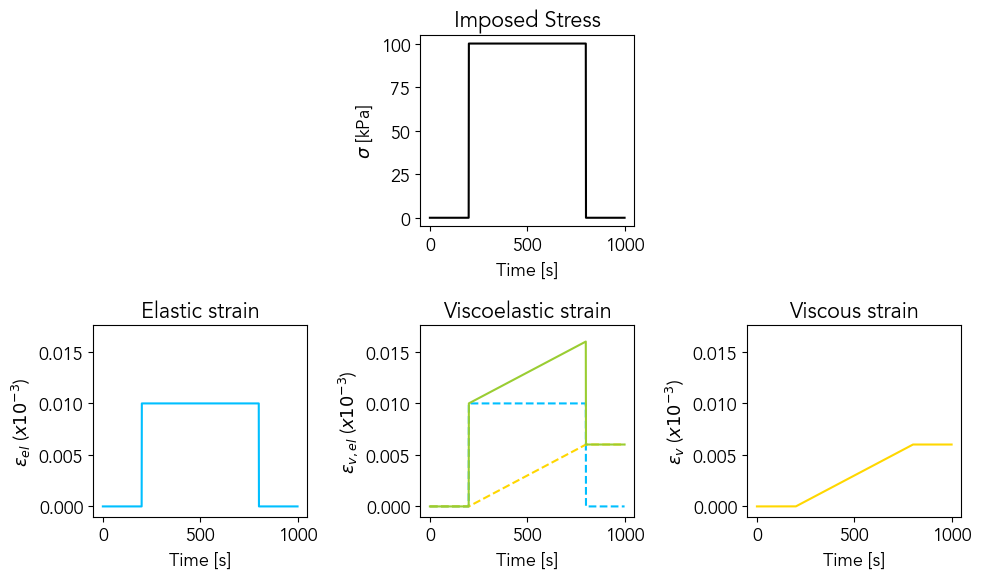

In [146]:
t = np.arange(0,1e3)             # Time [s]
sigma = np.zeros(t.shape)        # Imposed stress [Pa]
eps_el = np.zeros(t.shape)       # Elastic strain
eps_v = np.zeros(t.shape)        # Viscous strain
eps_v_el = np.zeros(t.shape)     # Viscoelastic strain

# Imposed stress:
sigma_o = 1e5
t_s = 200                        # Start time [s]
t_e = 800                        # End time [s]
sigma[(t>= t_s) &(t<= t_e)] = sigma_o

# Strain response:
eps_el = sigma/E
eps_v = integrate.cumtrapz(sigma,t,initial=0)/eta
eps_v_el = eps_el+eps_v

# Plots
fig, ax = plt.subplots(2,3,figsize = (10,6))

ax[0,0].set_axis_off()
ax[0,2].set_axis_off()

ax[0,1].plot(t,sigma/1e3,'k')
ax[0,1].set_xlabel("Time [s]")
ax[0,1].set_ylabel("$\sigma$ [kPa]")
ax[0,1].set_title("Imposed Stress")

ax[1,0].plot(t,eps_el*1e3,color='deepskyblue')
ax[1,0].set_xlabel("Time [s]")
ax[1,0].set_ylabel("$\epsilon_{el}$ ($x10^{-3}$)")
ax[1,0].set_title("Elastic strain")
ax[1,0].set_ylim(-0.001,1.1*max(eps_v_el)*1e3)

ax[1,1].plot(t,eps_el*1e3,'--',color = 'deepskyblue')
ax[1,1].plot(t,eps_v*1e3,'--',color='gold')
ax[1,1].plot(t,eps_v_el*1e3,color='yellowgreen')
ax[1,1].set_xlabel("Time [s]")
ax[1,1].set_ylabel("$\epsilon_{v,el}$ ($x10^{-3}$)")
ax[1,1].set_title("Viscoelastic strain")
ax[1,1].set_ylim(-0.001,1.1*max(eps_v_el)*1e3)

ax[1,2].plot(t,eps_v*1e3,color='gold')
ax[1,2].set_xlabel("Time [s]")
ax[1,2].set_ylabel("$\epsilon_{v}$ ($x10^{-3}$)")
ax[1,2].set_title("Viscous strain")
ax[1,2].set_ylim(-0.001,1.1*max(eps_v_el)*1e3)

plt.tight_layout()
plt.show()

### Example 1b: Linearly increasing stress

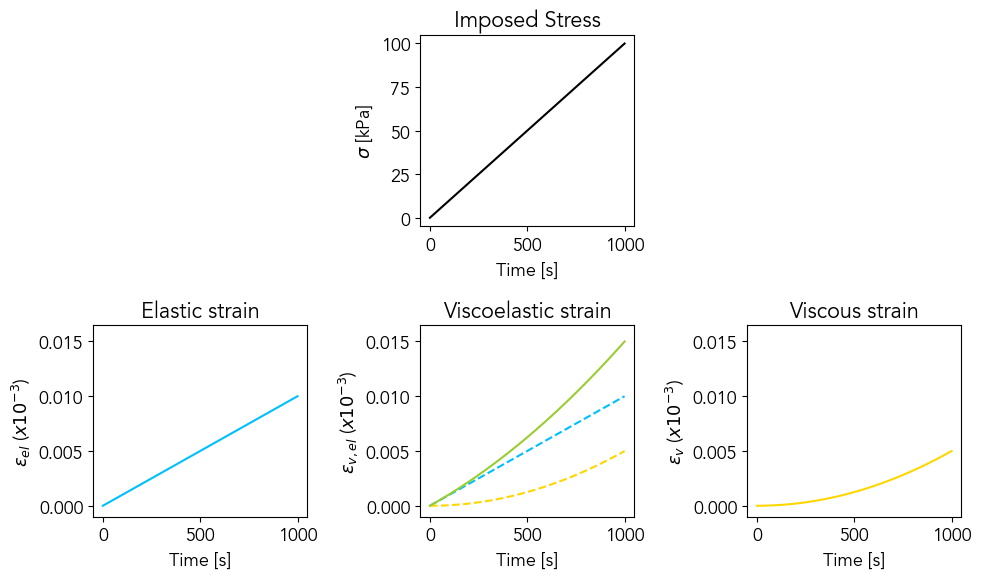

In [163]:
t = np.arange(0,1e3)             # Time [s]
sigma = np.zeros(t.shape)        # Imposed stress [Pa]
eps_el = np.zeros(t.shape)       # Elastic strain
eps_v = np.zeros(t.shape)        # Viscous strain
eps_v_el = np.zeros(t.shape)     # Viscoelastic strain

# Imposed stress:
sigma_rate_o = 1e2
sigma = sigma_rate_o*t

# Strain response:
eps_el = sigma/E
eps_v = integrate.cumtrapz(sigma,t,initial=0)/eta
eps_v_el = eps_el+eps_v

# Plots
fig, ax = plt.subplots(2,3,figsize = (10,6))

ax[0,0].set_axis_off()
ax[0,2].set_axis_off()

ax[0,1].plot(t,sigma/1e3,'k')
ax[0,1].set_xlabel("Time [s]")
ax[0,1].set_ylabel("$\sigma$ [kPa]")
ax[0,1].set_title("Imposed Stress")

ax[1,0].plot(t,eps_el*1e3,color='deepskyblue')
ax[1,0].set_xlabel("Time [s]")
ax[1,0].set_ylabel("$\epsilon_{el}$ ($x10^{-3}$)")
ax[1,0].set_title("Elastic strain")
ax[1,0].set_ylim(-0.001,1.1*max(eps_v_el)*1e3)

ax[1,1].plot(t,eps_el*1e3,'--',color = 'deepskyblue')
ax[1,1].plot(t,eps_v*1e3,'--',color='gold')
ax[1,1].plot(t,eps_v_el*1e3,color='yellowgreen')
ax[1,1].set_xlabel("Time [s]")
ax[1,1].set_ylabel("$\epsilon_{v,el}$ ($x10^{-3}$)")
ax[1,1].set_title("Viscoelastic strain")
ax[1,1].set_ylim(-0.001,1.1*max(eps_v_el)*1e3)

ax[1,2].plot(t,eps_v*1e3,color='gold')
ax[1,2].set_xlabel("Time [s]")
ax[1,2].set_ylabel("$\epsilon_v$ ($x10^{-3}$)")
ax[1,2].set_title("Viscous strain")
ax[1,2].set_ylim(-0.001,1.1*max(eps_v_el)*1e3)

plt.tight_layout()
plt.show()

### Remarks
Examples 1a and 1b illustrate the fact that for a **Maxwell** viscoelastic material, the elastic and viscous deformation resulting from an imposed stress (i.e., force) both contribute to the viscoelastic deformation and act in the same direction. 

## 2. Stress response to an imposed strain

The stress response of a purely elastic material to an imposed strain, $\epsilon(t)$, is $$\sigma_{el}(t) = E\epsilon(t)$$ and that of a purely viscous material is $$\sigma_v(t) = \eta\dot{\epsilon}(t)$$

For a **Maxwell** viscoelastic material, the situation is a bit more complicated when strain rather than stress is imposed because $\sigma_{v,el} \neq \sigma_{el}+\sigma_{v}$. Note, however, that $\sigma_{v,el} = \sigma_{el}+\sigma_{v}$ is the definition of a **Kelvin** viscoelastic material. 

Instead, the viscoelastic stress, $\sigma_{v,el}$, has to be solved from:
$$\epsilon(t) = \epsilon_{el}(t) + \epsilon_v(t) = \frac{\sigma_{v,el}(t)}{E} + \int_0^t{\frac{\sigma_{v,el}(t)}{\eta}dt}$$

and/or
$$\dot{\epsilon}(t) = \dot{\epsilon}_{el}(t) + \dot{\epsilon}_{v}(t) = \frac{\dot{\sigma}_{v,el}(t)}{E}+\frac{\sigma_{v,el}(t)}{\eta}$$


### Example 2a: Step increase in strain
When the step increase in strain, $\epsilon_0$, is applied at time $t = t_s$, no viscous strain has occured yet because $\int_0^{t_s}\sigma_{v,el}(t)dt = 0$. Hence $\sigma_{v,el}(t_s) = E\epsilon_0$.

For $t>t_s$, $\dot{\epsilon} = 0$ and we can solve the ODE
$$ 0 = \frac{\dot{\sigma}_{v,el}(t)}{E}+\frac{\sigma_{v,el}(t)}{\eta}$$
with initial condition $\sigma_{v,el}(t_s) = E\epsilon_0$ to obtain
$$ \sigma_{v,el}(t) = E\epsilon_o\exp\left(-\frac{E}{\eta}(t-t_s)\right) $$

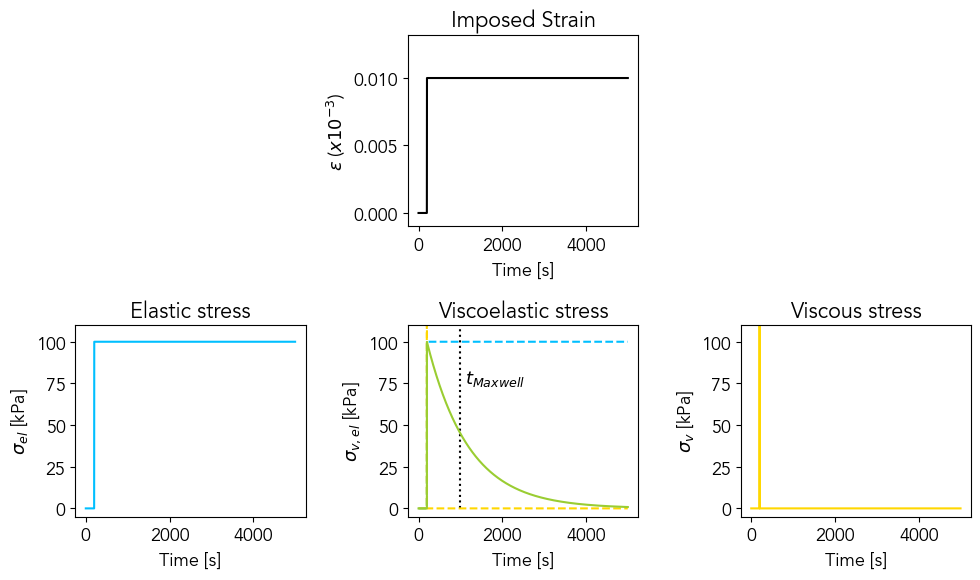

In [165]:
t = np.arange(0,5e3)               # Time [s]
eps = np.zeros(t.shape)            # Imposed strain
sigma_el = np.zeros(t.shape)       # Elastic stress [Pa]
sigma_v = np.zeros(t.shape)        # Viscous stress [Pa]
sigma_v_el = np.zeros(t.shape)     # Viscoelastic stress [Pa]

# Imposed strain:
eps_o = 1e-5
t_s = 200                          # Start time [s]
eps[t>= t_s] = eps_o

# Strain response:
sigma_el = E*eps
sigma_v = eta*diff(eps)/diff(t)
sigma_v_el[t>t_s] = E*eps_o*np.exp(-E/eta*(t[t>t_s]-t_s))

# Plots
fig, ax = plt.subplots(2,3,figsize = (10,6))

ax[0,0].set_axis_off()
ax[0,2].set_axis_off()

ax[0,1].plot(t,eps*1e3,'k')
ax[0,1].set_xlabel("Time [s]")
ax[0,1].set_ylabel("$\epsilon$ ($x10^{-3}$)")
ax[0,1].set_title("Imposed Strain")
ax[0,1].set_ylim(-0.001,1.1*0.012)

ax[1,0].plot(t,sigma_el/1e3,color='deepskyblue')
ax[1,0].set_xlabel("Time [s]")
ax[1,0].set_ylabel("$\sigma_{el}$ [kPa]")
ax[1,0].set_title("Elastic stress")
ax[1,0].set_ylim(-5,1.1*max(sigma_el)/1e3)

ax[1,1].plot([t_maxwell, t_maxwell],[0,1.1*max(sigma_el)/1e3],'k:')
ax[1,1].text(1.1*t_maxwell,75,'$t_{Maxwell}$')
ax[1,1].plot(t,sigma_el/1e3,'--',color = 'deepskyblue')
ax[1,1].plot(t[:-1],sigma_v/1e3,'--',color='gold')
ax[1,1].plot(t,sigma_v_el/1e3,color='yellowgreen')
ax[1,1].set_xlabel("Time [s]")
ax[1,1].set_ylabel("$\sigma_{v,el}$ [kPa]")
ax[1,1].set_title("Viscoelastic stress")
ax[1,1].set_ylim(-5,1.1*max(sigma_el)/1e3)

ax[1,2].plot(t[:-1],sigma_v/1e3,color='gold')
ax[1,2].set_xlabel("Time [s]")
ax[1,2].set_ylabel("$\sigma_v$ [kPa]")
ax[1,2].set_title("Viscous stress")
ax[1,2].set_ylim(-5,1.1*max(sigma_el)/1e3)

plt.tight_layout()
plt.show()

### Example 2b: Linearly increasing strain

For a given **constant** strain rate $\dot{\epsilon}_0$, we can solve the ODE
$$  \dot{\epsilon}_0 = \frac{\dot{\sigma}_{v,el}(t)}{E}+\frac{\sigma_{v,el}(t)}{\eta}$$
with initial condition $\sigma_{v,el}(0) = 0$ to obtain
$$ \sigma_{v,el}(t) = -\eta\dot{\epsilon}_o\exp(-E/\eta t)+\eta\dot{\epsilon}_o$$

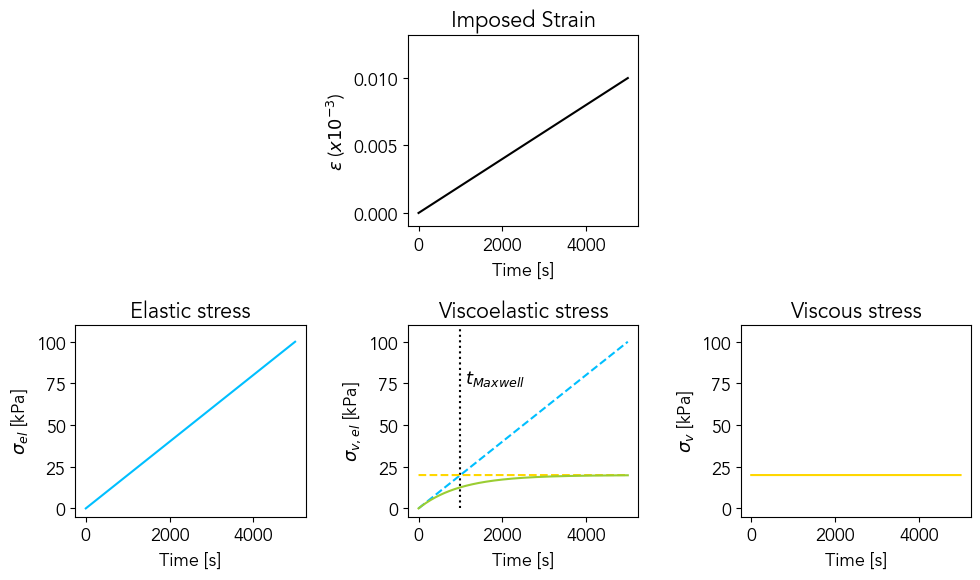

In [168]:
t = np.arange(0,5e3)               # Time [s]
eps = np.zeros(t.shape)            # Imposed strain
sigma_el = np.zeros(t.shape)       # Elastic stress [Pa]
sigma_v = np.zeros(t.shape)        # Viscous stress [Pa]
sigma_v_el = np.zeros(t.shape)     # Viscoelastic stress [Pa]

# Imposed strain:
eps_rate_o = 1e-5/5e3
eps = eps_rate_o*t

# Strain response:
sigma_el = E*eps
sigma_v = eta*diff(eps)/diff(t)
sigma_v_el = -eta*eps_rate_o*np.exp(-E/eta*t)+eta*eps_rate_o

# Plots
fig, ax = plt.subplots(2,3,figsize = (10,6))

ax[0,0].set_axis_off()
ax[0,2].set_axis_off()

ax[0,1].plot(t,eps*1e3,'k')
ax[0,1].set_xlabel("Time [s]")
ax[0,1].set_ylabel("$\epsilon$ ($x10^{-3}$)")
ax[0,1].set_title("Imposed Strain")
ax[0,1].set_ylim(-0.001,1.1*0.012)

ax[1,0].plot(t,sigma_el/1e3,color='deepskyblue')
ax[1,0].set_xlabel("Time [s]")
ax[1,0].set_ylabel("$\sigma_{el}$ [kPa]")
ax[1,0].set_title("Elastic stress")
ax[1,0].set_ylim(-5,1.1*max(sigma_el)/1e3)

ax[1,1].plot([t_maxwell, t_maxwell],[0,1.1*max(sigma_el)/1e3],'k:')
ax[1,1].text(1.1*t_maxwell,75,'$t_{Maxwell}$')
ax[1,1].plot(t,sigma_el/1e3,'--',color = 'deepskyblue')
ax[1,1].plot(t[:-1],sigma_v/1e3,'--',color='gold')
ax[1,1].plot(t,sigma_v_el/1e3,color='yellowgreen')
ax[1,1].set_xlabel("Time [s]")
ax[1,1].set_ylabel("$\sigma_{v,el}$ [kPa]")
ax[1,1].set_title("Viscoelastic stress")
ax[1,1].set_ylim(-5,1.1*max(sigma_el)/1e3)

ax[1,2].plot(t[:-1],sigma_v/1e3,color='gold')
ax[1,2].set_xlabel("Time [s]")
ax[1,2].set_ylabel("$\sigma_v$ [kPa]")
ax[1,2].set_title("Viscous stress")
ax[1,2].set_ylim(-5,1.1*max(sigma_el)/1e3)

plt.tight_layout()
plt.show()

### Remarks
Examples 2a and 2b illustrate the idea that for a given imposed strain or strain rate, Maxwell viscoelastic stresses are well approximated by the elastic and viscous stresses for $t\ll t_{Maxwell}$ and $t\gg t_{Maxwell}$, respectively. Moreover, it is clear from these plots that we cannot estimate the viscoelastic stresses at a given time $t$ by simply summing up the corresponding elastic and viscous stresses at time $t$. What we can do, however, is to use viscous stresses to approximate the viscoelastic stresses arising from a long-running deformation process and use elastic stresses to approximate the viscoelastic stresses associated with a relativately fast deformation process. For example, it makes sense to estimate the absolute stress field **shortly after** a rapid supraglacial lake drainage event by summing the elastic stresses associated with the drainage event and the viscous stresses associated with long-term ice sheet deformation. 